# ResNet 응용

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [9]:
res50 = ResNet50()
res50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [10]:
from tensorflow.keras.applications.resnet import ResNet101, decode_predictions
res101 = ResNet101()

179658752/179648224 [==============================] - 2s 0us/step


In [3]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving puppy.jpg to puppy.jpg


In [4]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h*IMAGE_SIZE)//w
    else:
        width, height = (w*IMAGE_SIZE)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

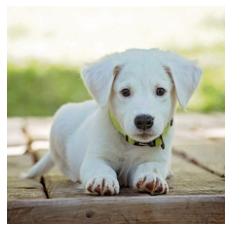

In [12]:
import matplotlib.pyplot as plt

img = Image.open('puppy.jpg')
img2 = center_image(img)
plt.imshow(img2), plt.axis("off");

- 이미지 예측

In [14]:
yhat = res50.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02099601', 'golden_retriever', 0.6317783),
   ('n02099712', 'Labrador_retriever', 0.26829892),
   ('n02104029', 'kuvasz', 0.03299411),
   ('n04409515', 'tennis_ball', 0.012093174),
   ('n03223299', 'doormat', 0.0064191218)]])

In [15]:
label[0][0][1], label[0][0][2]

('golden_retriever', 0.6317783)

In [17]:
yhat = res101.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02099712', 'Labrador_retriever', 0.9528138),
   ('n02099601', 'golden_retriever', 0.043096416),
   ('n02104029', 'kuvasz', 0.00166695),
   ('n02088364', 'beagle', 0.0009301025),
   ('n02099849', 'Chesapeake_Bay_retriever', 0.0004203835)]])

In [18]:
label[0][0][1], label[0][0][2]

('Labrador_retriever', 0.9528138)

# 선생님 사진으로 코드 잘 도나 확인

In [19]:
from google.colab import files
up = files.upload()

Saving 증명사진 트리밍.jpg to 증명사진 트리밍.jpg


In [ ]:
img = Image.open('증명사진 트리밍.jpg')
img2 = center_image(img)
plt.imshow(img2), plt.axis("off");

In [21]:
yhat = res101.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label
# 내 얼굴에서 아카데믹 그로운 졸업식. 학사모 예측 의미심장하네.
# 윈저노트법 매기 넥타이 5퍼, 수트 3퍼, 밀리터리 유티폼 3퍼. 엥???

((1, 1000),
 [[('n02669723', 'academic_gown', 0.43360347),
   ('n03787032', 'mortarboard', 0.07195791),
   ('n04591157', 'Windsor_tie', 0.051781513),
   ('n04350905', 'suit', 0.03886068),
   ('n03763968', 'military_uniform', 0.03873765)]])

In [22]:
label[0][0][1], label[0][0][2]

('academic_gown', 0.43360347)